In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

read the data

In [3]:
def readFile(filename):
    datas = pd.read_csv(filename, header=None)
    returnMat = np.zeros((len(datas), 3))
    datas = datas.values
    labelVector = []
    index = 0
    for data in datas:
        returnMat[index, 0:2] = data[0: 2]
        returnMat[index, -1] = 1
        labelVector.append(int(data[-1]))
        index += 1
    return returnMat, labelVector

show the data

In [4]:
def drawn(dataMat, labels, W):
    for i in range(len(labels)):
        if labels[i] == 1:
            plt.scatter(dataMat[i,0], dataMat[i,1], c = 'red')
        else:
            plt.scatter(dataMat[i,0], dataMat[i,1], c = 'green')
    x0 = np.arange(4.5, 8.0, 0.06)
    x1 = (-W[0]*x0-W[2])/W[1]
    plt.scatter(x0, x1)
    plt.grid(True)#显示网格线
    plt.show()

calculate the W*x and the label

In [5]:
def sign(W,dataMat):
    index = 0
    labelSet = []
    for d in dataMat:
        result = W.dot(d.T)
        if result > 0:
            labelSet.append(1)
        else:
            labelSet.append(-1)
        index += 1
    return labelSet

In [6]:
def verify(signResult, labels):
    error = 0
    for i in range(len(signResult)):
        if signResult[i] != labels[i]:
            error += 1
    return error

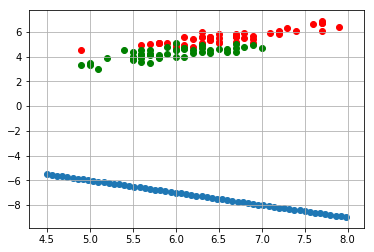

In [10]:
dataMat, labels = readFile('F:/workspace-Jupyter/NationalFestival_HW/data2.csv')
W = np.array([1, 1, 1])
drawn(dataMat[:,0:2], labels, W)
signResult = sign(W,dataMat)
oldW = W
oldError = verify(signResult, labels)

W:  [-23.1  24.4   0. ]
error:  49


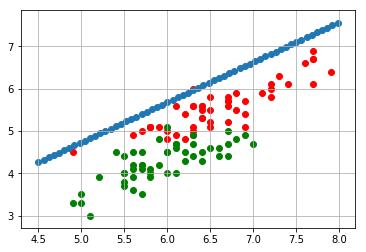

In [11]:
generation = 50    # 设置更新次数上限
count = 0
while count < generation:
    for s in range(len(signResult)):
        if signResult[s] != labels[s]:
            # 更新权重W
            W = W + labels[s]*dataMat[s, :]
            # 重新计算label
            signResult = sign(W,dataMat)
            error = verify(signResult, labels)
            if error <= oldError:
                oldW = W    # 保留结果最好的权重
                oldError = error
            count += 1
print('W: ',oldW)
print('error: ',oldError)
drawn(dataMat[:,0:2], labels,oldW)